<a href="https://colab.research.google.com/github/I-jidd/Data-Analysis/blob/main/CatDog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python

In [ ]:
import tensorflow as tf
import os

#2. remove unnecessary images

In [ ]:
import cv2
import imghdr

<ipython-input-4-4232469594>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [17]:
data_dir ='data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print(f'Image not in ext list {image_path}')
        os.remove(image_path)
    except Exception as e:
      print(f'Issue with image {image_path}')

Image not in ext list data/dog/image (20).svg
Image not in ext list data/dog/image (14).svg
Image not in ext list data/dog/image (6).svg
Image not in ext list data/dog/image (3).svg
Image not in ext list data/dog/dog-training-pad-567327-jpg.webp
Image not in ext list data/dog/signs-dog-happy-header-jpg.webp
Image not in ext list data/dog/image (12).svg
Image not in ext list data/dog/Dog_-rights_MS_breeds_outdoors_stationary__two-dogs-sitting-.webp
Image not in ext list data/dog/golden-retriever-pup-1.png
Image not in ext list data/dog/image (19).svg
Image not in ext list data/dog/image (18).svg
Image not in ext list data/dog/image (30).svg
Image not in ext list data/dog/24px.svg
Image not in ext list data/dog/ryan-stone-FTzRYeD5lAs-unsplash_1920x1080.png
Image not in ext list data/dog/German-Shepherds-dans-pet-care.jpeg
Image not in ext list data/dog/GD-Homepage-Manton-Mobile.jpg
Image not in ext list data/dog/image (2).svg
Image not in ext list data/dog/79242386007-usatsi-22879805.jpg

#3. Load Data

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 204 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()


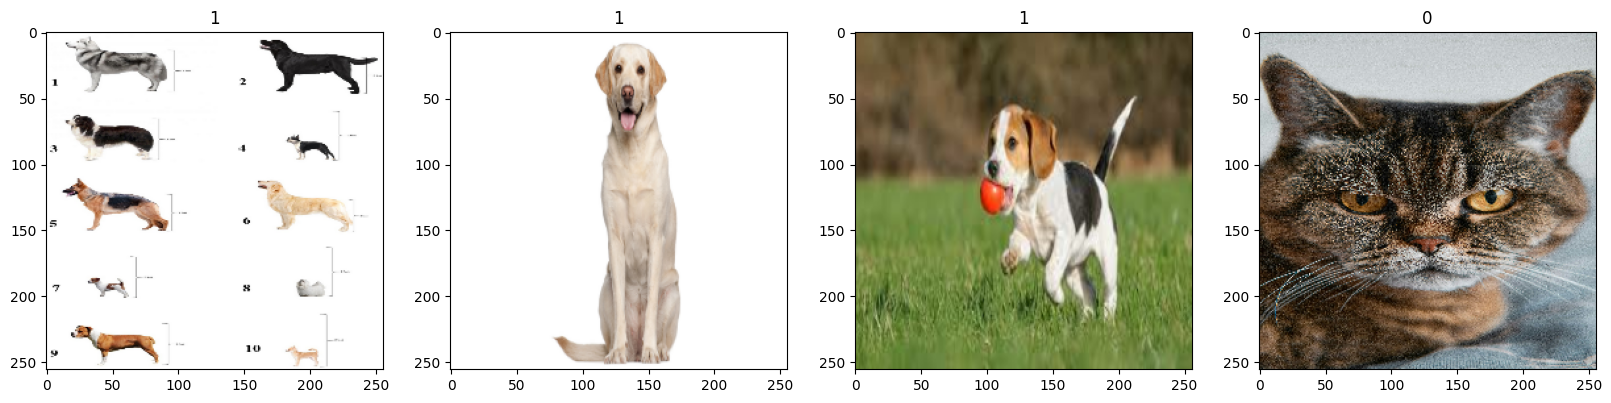

In [24]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [25]:
#4. Scale Data

In [26]:
data = data.map(lambda x,y: (x/255,y))

#5. Split Data

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
#6. Build Deep Learning Model

In [38]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [40]:
model = Sequential()

In [42]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu',))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#7. Train

In [46]:
logdir= 'logs'

In [47]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=20, validation_data =val, callbacks=[tensorboard_callbacks])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.4250 - loss: 1.5698 - val_accuracy: 0.4062 - val_loss: 0.7892
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5750 - loss: 0.6723 - val_accuracy: 0.5156 - val_loss: 0.6832
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5594 - loss: 0.6686 - val_accuracy: 0.6719 - val_loss: 0.6427
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - accuracy: 0.5188 - loss: 0.6705 - val_accuracy: 0.6406 - val_loss: 0.6550
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.7396 - loss: 0.6110 - val_accuracy: 0.7656 - val_loss: 0.5705
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.7635 - loss: 0.5486 - val_accuracy: 0.7500 - val_loss: 0.5188
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.8031 - loss: 0.5251 - val_accuracy: 0.7656 - val_loss: 0.4882
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.7271 - loss: 0.5061 - val_accuracy: 0.7031 - val_loss: 0.4961
Epoch 9/

#8. Plot Performance

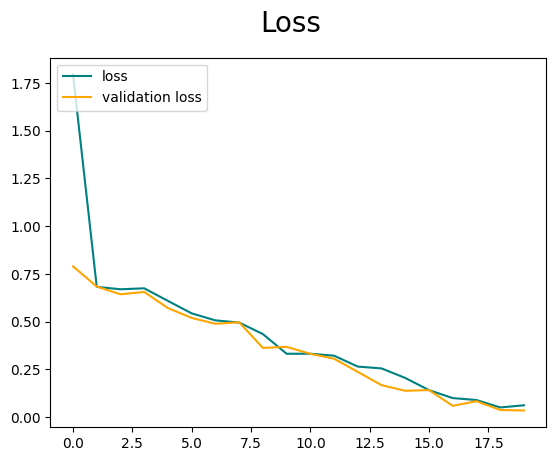

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='validation loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

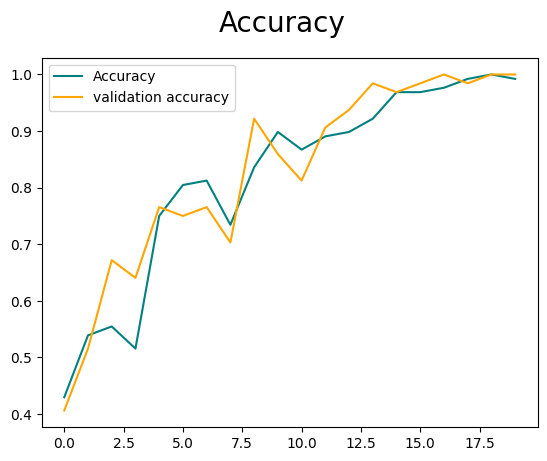

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='validation accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

#9. Evaluate

In [54]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [55]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [56]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


In [60]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


#10. Test

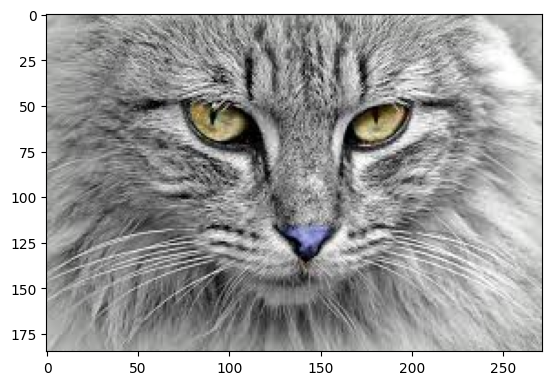

In [71]:
img = cv2.imread('cattest1.jpeg')
plt.imshow(img)
plt.show()

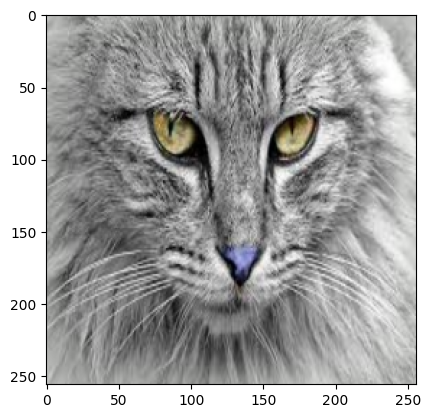

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [74]:
yhat

array([[0.03239442]], dtype=float32)

In [75]:
if yhat > 0.5:
  print('The predicted class is a dog')
else:
  print('The predicted class is a cat')

The predicted class is a cat


#11. Save the model

In [76]:
from tensorflow.keras.models import load_model

In [79]:
model.save(os.path.join('models','catdogClassifier.keras'))

In [89]:
new_model = load_model('catdogClassifier.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [90]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


array([[0.03239442]], dtype=float32)